# POSTMAN AI ML TASK
## First we are going to perform an EDA on the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
smoking=pd.read_csv('smoking.csv')

In [3]:
smoking.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N


### Understanding the data

In [4]:
smoking.tail()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
991341,Male,45,175,80,92.1,1.5,1.5,1,1,114,...,125,132,15.0,1,1.0,26,36,27,1,N
991342,Male,35,170,75,86.0,1.0,1.5,1,1,119,...,84,45,15.8,1,1.1,14,17,15,1,N
991343,Female,40,155,50,68.0,1.0,0.7,1,1,110,...,77,157,14.3,1,0.8,30,27,17,3,Y
991344,Male,25,175,60,72.0,1.5,1.0,1,1,119,...,73,53,14.5,1,0.8,21,14,17,1,N
991345,Male,50,160,70,90.5,1.0,1.5,1,1,133,...,153,163,15.8,1,0.9,24,43,36,3,Y


In [5]:
smoking.shape


(991346, 24)

In [6]:
smoking.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


**Looking at the data, we want to predict whether a particular person is a smoker/drinker are not. We want to predict the variable DRK_YN from the given variables.**


In [7]:
smoking.nunique()


sex                    2
age                   14
height                13
weight                24
waistline            737
sight_left            24
sight_right           24
hear_left              2
hear_right             2
SBP                  171
DBP                  127
BLDS                 498
tot_chole            474
HDL_chole            223
LDL_chole            432
triglyceride        1657
hemoglobin           190
urine_protein          6
serum_creatinine     183
SGOT_AST             568
SGOT_ALT             594
gamma_GTP            940
SMK_stat_type_cd       3
DRK_YN                 2
dtype: int64

### Cleaning the data

In [8]:
smoking.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

**No null values<br>
Now we shall drop the redundant data<br>
Height,weight,waistline,sight_left,sight_right,hear_left,hear_right are not required**

In [9]:
smoking= smoking.drop(['height','weight','waistline','sight_left','sight_right','hear_left','hear_right'],axis=1)

In [10]:
smoking.head()

,sex,age,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,120,80,99,193,48,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,130,82,106,228,55,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,120,70,98,136,41,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,145,87,95,201,76,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,138,82,101,199,61,117,104,13.8,1,0.8,19,12,25,1,N


**Now we shall remove the outliers.<br>
Looking at the data manually, i feel the best variable to look for outliers in the data is tryglyceride as it has 1657 unique values and it can be very high in some people which might affect the data.**

In [11]:
up=smoking['triglyceride'].mean()+4*smoking['triglyceride'].std()
low=smoking['triglyceride'].mean()-4*smoking['triglyceride'].std()
print(up,low)


540.9296902769296 -276.6461888556296


In [12]:
#we shall remove the outliers now
#as it cant be negative
smoking=smoking.loc[(smoking['triglyceride']<up)]

In [13]:
smoking.head()

,sex,age,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,120,80,99,193,48,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,130,82,106,228,55,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,120,70,98,136,41,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,145,87,95,201,76,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,138,82,101,199,61,117,104,13.8,1,0.8,19,12,25,1,N


**Now we shall list the rows in which DRK_YN is a Y(list all the people who are actually smokers and drinkers)**

In [14]:
tr_smoke=smoking.loc[smoking['DRK_YN'] == 'Y']

In [15]:
no_smoke=smoking.loc[smoking['DRK_YN'] == 'N']

In [16]:
no_smoke.head()

,sex,age,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
1,Male,30,130,82,106,228,55,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,120,70,98,136,41,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,145,87,95,201,76,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,138,82,101,199,61,117,104,13.8,1,0.8,19,12,25,1,N
6,Female,45,101,58,89,196,66,115,75,12.3,1,0.8,19,12,12,1,N


**tr_smoke represents the data of people who actually smoke or drink**

In [17]:
#now lets see  what variables actually matter.

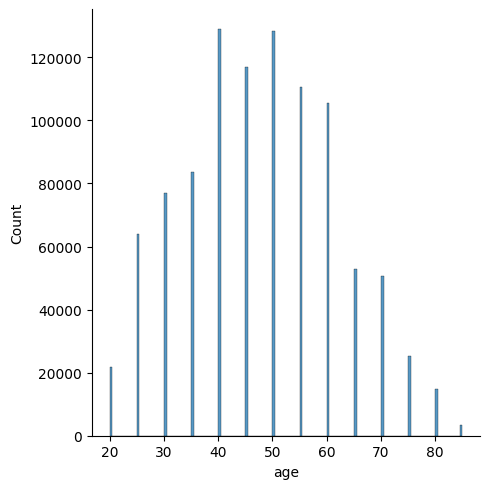

In [18]:
#age
sns.displot(data=smoking, x='age')
plt.show()

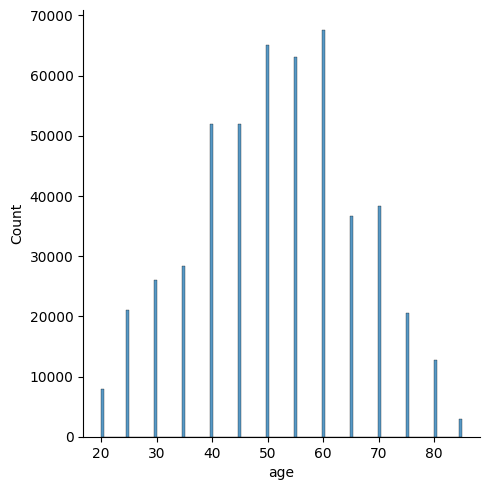

In [19]:
sns.displot(data=no_smoke, x='age')
plt.show()

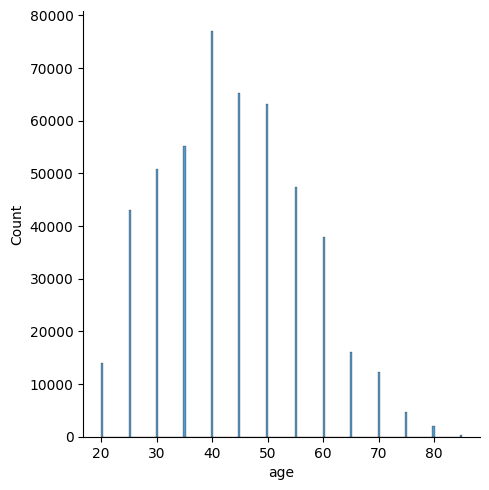

In [20]:
sns.displot(data=tr_smoke, x='age')
plt.show()

**There is not much difference between the plots of people who smoke vs ppl who dont smoke. So age in not an important variable.**

<Axes: xlabel='sex', ylabel='count'>

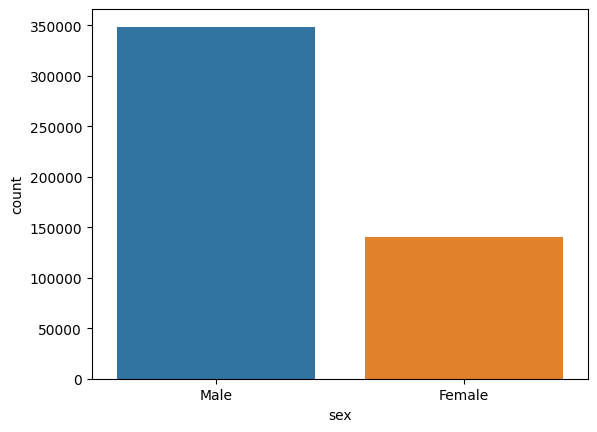

In [21]:
#sex
#checking the ratio in true smokers
sns.countplot(x='sex',data=tr_smoke)

<Axes: xlabel='sex', ylabel='count'>

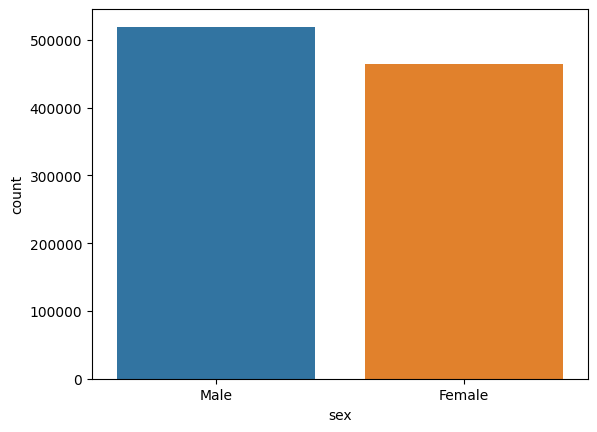

In [22]:
# we might be tempted to conclude that male has a higher chance to be a smoker but we have to check the overall population distribution.
sns.countplot(x='sex',data=smoking)

**As the sex ratio is nearly 1:1 in the overall popluation and there is a higher percentage of men(nearly double) in the substance abuse population,we conclude that men are more vulnerable to substance abuse.**

<Axes: xlabel='LDL_chole', ylabel='Count'>

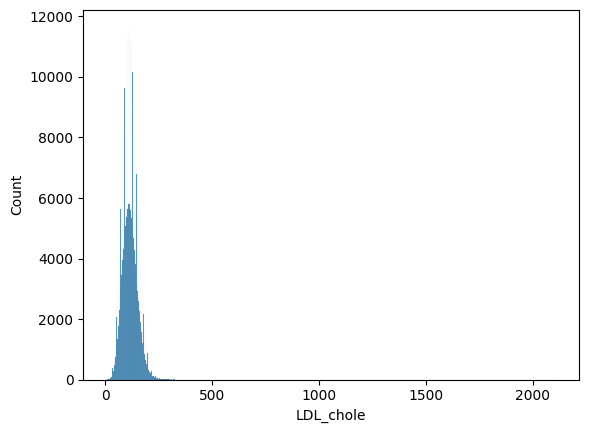

In [23]:
sns.histplot(x='LDL_chole',data=no_smoke)

<Axes: xlabel='LDL_chole', ylabel='Count'>

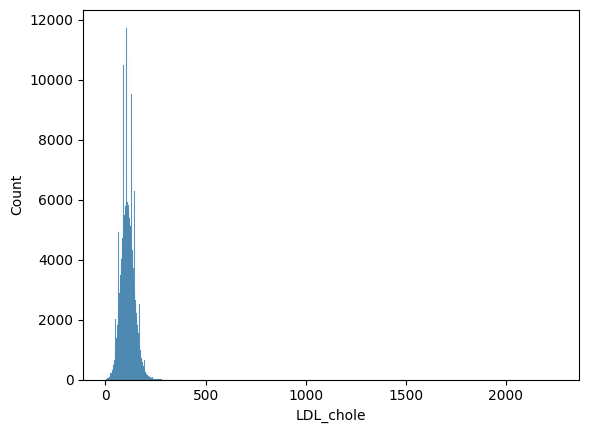

In [24]:
sns.histplot(x='LDL_chole',data=tr_smoke)

<Axes: xlabel='HDL_chole', ylabel='Count'>

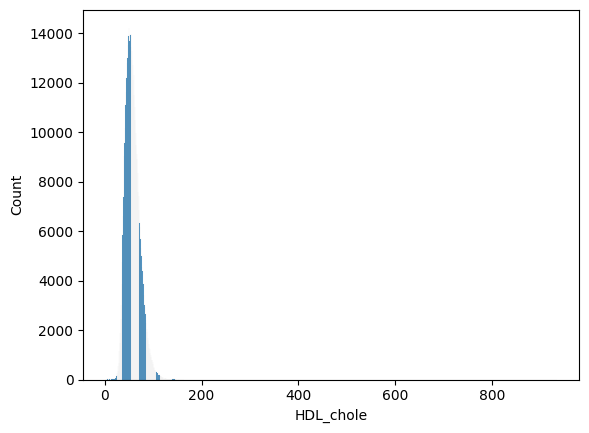

In [25]:
sns.histplot(x='HDL_chole',data=tr_smoke)

<Axes: xlabel='HDL_chole', ylabel='Count'>

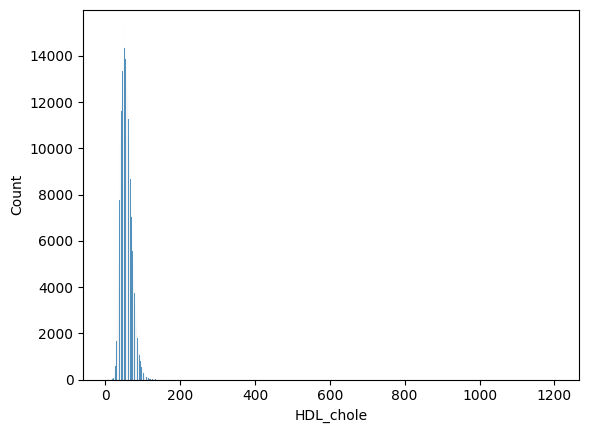

In [26]:
sns.histplot(x='HDL_chole',data=no_smoke)

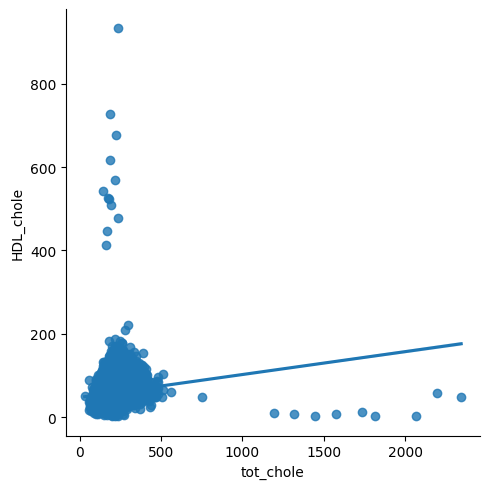

In [27]:
sns.lmplot(x='tot_chole', y='HDL_chole', data=tr_smoke)


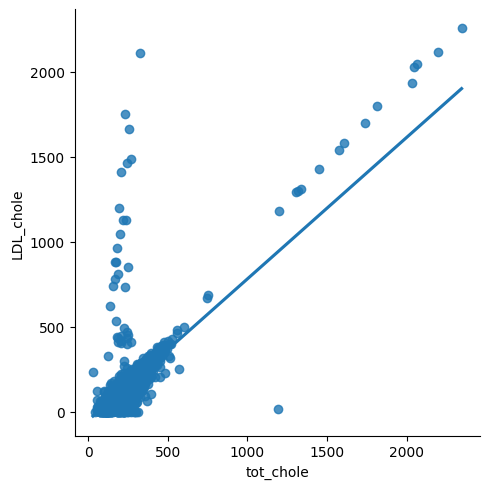

In [28]:
sns.lmplot(x='tot_chole', y='LDL_chole', data=smoking)


**Both the HDL and LDL levels are highers for people who did substance abuse.
The total cholestrol levels are significantly higher is people who did substance abuse.
LDL cholestrol is more directly related to total cholestrol than HDL cholestrol.**


<Axes: xlabel='SBP', ylabel='Count'>

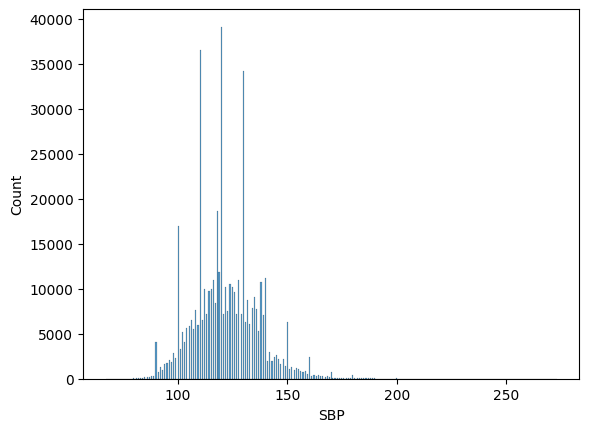

In [29]:
sns.histplot(x='SBP',data=no_smoke)

<Axes: xlabel='SBP', ylabel='Count'>

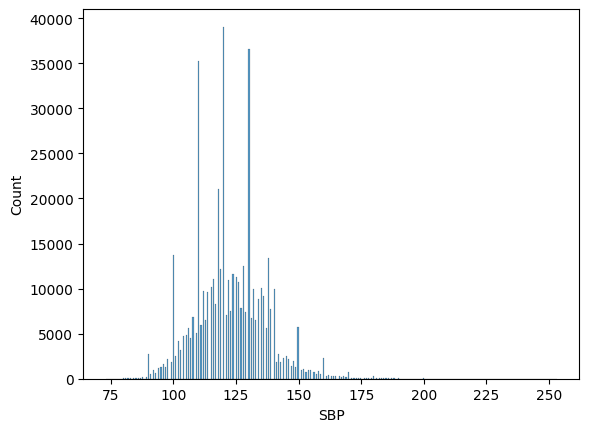

In [30]:
sns.histplot(x='SBP',data=tr_smoke)

**This shows us that SBP is not an important variable**

<Axes: xlabel='DBP', ylabel='Count'>

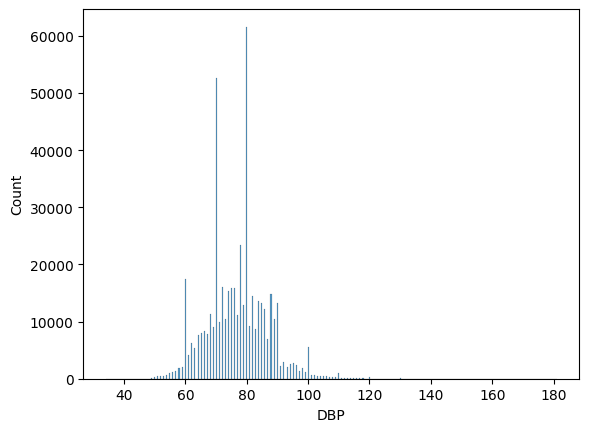

In [31]:
sns.histplot(x='DBP',data=tr_smoke)

<Axes: xlabel='DBP', ylabel='Count'>

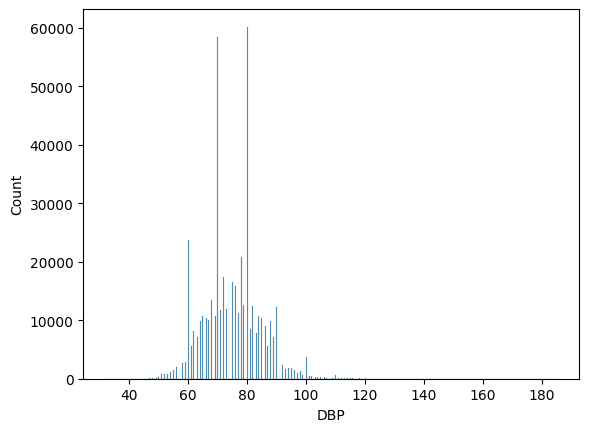

In [32]:
sns.histplot(x='DBP',data=no_smoke)

**We can conclude that SBP and DBP are not very important variables.<br>
 We can also say that if your HDL and LDL levels are high, then total cholestrol level will also be high.**

<Axes: xlabel='urine_protein', ylabel='count'>

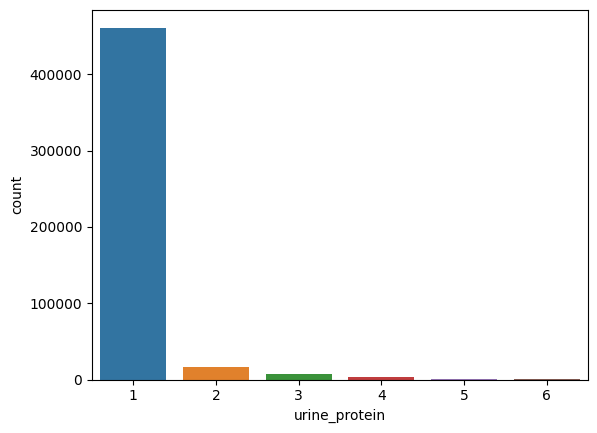

In [33]:
sns.countplot(x='urine_protein',data=tr_smoke)

<Axes: xlabel='urine_protein', ylabel='count'>

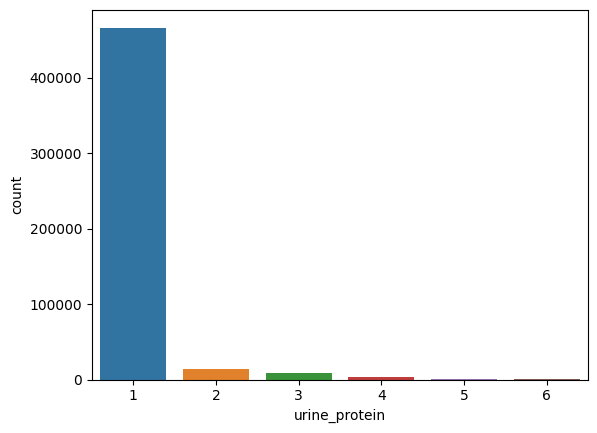

In [34]:
sns.countplot(x='urine_protein',data=no_smoke)

In [35]:
##urine protein is not an important variable are there is not much difference in people who drink and not drink.
##now that we know that HDL and LDL are related to total cholestrol, we can remove those two variables as well
smoking= smoking.drop(['age','SBP','DBP','HDL_chole','LDL_chole','urine_protein','serum_creatinine'],axis=1)

In [36]:
tr_smoke=smoking.loc[smoking['DRK_YN'] == 'Y']
no_smoke=smoking.loc[smoking['DRK_YN'] == 'N']

In [37]:
smoking.head()


,sex,BLDS,tot_chole,triglyceride,hemoglobin,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,99,193,92,17.1,21,35,40,1,Y
1,Male,106,228,121,15.8,20,36,27,3,N
2,Male,98,136,104,15.8,47,32,68,1,N
3,Male,95,201,106,17.6,29,34,18,1,N
4,Male,101,199,104,13.8,19,12,25,1,N


In [38]:
#according to google the ratio of AST/ALT >1 indicates that the person has a good chance to be a substance abuser.
#hence we create another column for the ratio and remove the existing columns

smoking['AST/ALT']=smoking['SGOT_AST']/smoking['SGOT_ALT']

In [39]:
smoking=smoking.drop(['SGOT_AST','SGOT_ALT'],axis=1)

In [40]:
smoking.head()

,sex,BLDS,tot_chole,triglyceride,hemoglobin,gamma_GTP,SMK_stat_type_cd,DRK_YN,AST/ALT
0,Male,99,193,92,17.1,40,1,Y,0.600000
1,Male,106,228,121,15.8,27,3,N,0.555556
2,Male,98,136,104,15.8,68,1,N,1.468750
3,Male,95,201,106,17.6,18,1,N,0.852941
4,Male,101,199,104,13.8,25,1,N,1.583333


In [41]:
tr_smoke=smoking.loc[smoking['DRK_YN'] == 'Y']
no_smoke=smoking.loc[smoking['DRK_YN'] == 'N']

In [42]:
tr_smoke.head()

,sex,BLDS,tot_chole,triglyceride,hemoglobin,gamma_GTP,SMK_stat_type_cd,DRK_YN,AST/ALT
0,Male,99,193,92,17.1,40,1,Y,0.600000
5,Male,99,218,232,13.8,37,3,Y,0.725000
7,Male,94,185,101,14.4,35,3,Y,1.000000
8,Male,104,217,100,15.1,26,1,Y,1.391304
9,Male,100,195,83,13.9,16,2,Y,0.552632


In [43]:
tr_smoke.tail()

,sex,BLDS,tot_chole,triglyceride,hemoglobin,gamma_GTP,SMK_stat_type_cd,DRK_YN,AST/ALT
991336,Male,109,171,57,12.0,15,2,Y,1.636364
991338,Male,87,211,92,15.4,50,2,Y,0.961538
991339,Male,93,167,105,16.1,32,1,Y,1.769231
991343,Female,90,205,157,14.3,17,3,Y,1.111111
991345,Male,99,225,163,15.8,36,3,Y,0.558140


<Axes: xlabel='SMK_stat_type_cd', ylabel='count'>

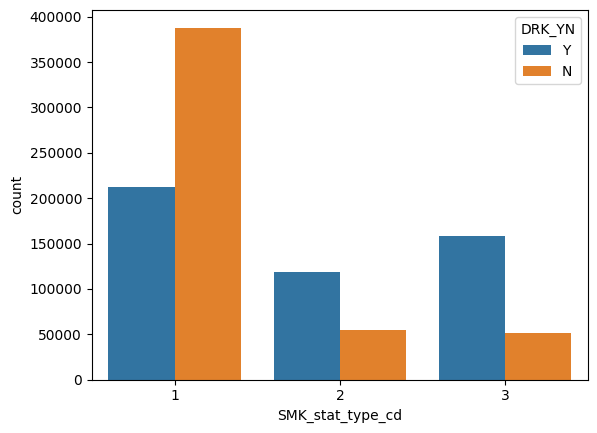

In [44]:
sns.countplot(x='SMK_stat_type_cd',data=smoking,hue='DRK_YN')


**We can see that people who substance abuse have a higher value of SMK_stat. hence its an important variable.**


<Axes: xlabel='gamma_GTP', ylabel='Count'>

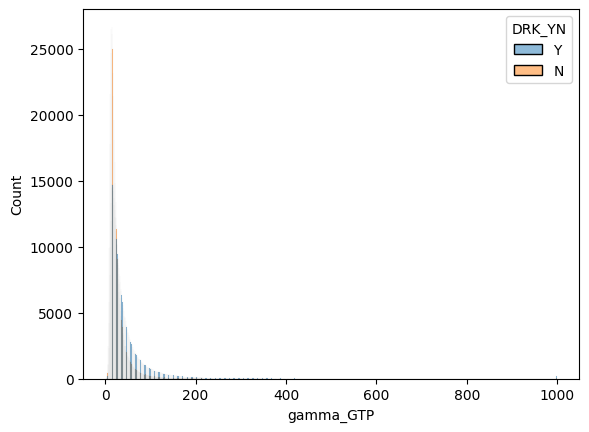

In [45]:
sns.histplot(x='gamma_GTP',data=smoking,hue='DRK_YN')

In [46]:
#again people who substance abuse have higher levels of gamma_gtp, hence its an important variable.
#renaming the columns so that we can understand better.
smoking.rename(columns={"tot_chole": "cholestrol","DRK_YN":"Y/N"}, inplace=True)

In [47]:
tr_smoke=smoking.loc[smoking['Y/N'] == 'Y']

In [48]:
no_smoke=smoking.loc[smoking['Y/N'] == 'N']

In [49]:
smoking.head()

,sex,BLDS,cholestrol,triglyceride,hemoglobin,gamma_GTP,SMK_stat_type_cd,Y/N,AST/ALT
0,Male,99,193,92,17.1,40,1,Y,0.600000
1,Male,106,228,121,15.8,27,3,N,0.555556
2,Male,98,136,104,15.8,68,1,N,1.468750
3,Male,95,201,106,17.6,18,1,N,0.852941
4,Male,101,199,104,13.8,25,1,N,1.583333


## Model Creation

In [50]:
#We are done with the EDA in which we have removed the unwanted variables and the data is now ready to be fed into an ML model.
##data seperation.
y=smoking['Y/N']



In [51]:
x=smoking.drop('Y/N',axis=1)
x

,sex,BLDS,cholestrol,triglyceride,hemoglobin,gamma_GTP,SMK_stat_type_cd,AST/ALT
0,Male,99,193,92,17.1,40,1,0.600000
1,Male,106,228,121,15.8,27,3,0.555556
2,Male,98,136,104,15.8,68,1,1.468750
3,Male,95,201,106,17.6,18,1,0.852941
4,Male,101,199,104,13.8,25,1,1.583333
...,...,...,...,...,...,...,...,...
991341,Male,88,198,132,15.0,27,1,0.722222
991342,Male,83,133,45,15.8,15,1,0.823529
991343,Female,90,205,157,14.3,17,3,1.111111
991344,Male,69,122,53,14.5,17,1,1.500000


In [52]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
     

In [53]:
X_train ##80 percent of data

,sex,BLDS,cholestrol,triglyceride,hemoglobin,gamma_GTP,SMK_stat_type_cd,AST/ALT
740490,Male,113,194,92,16.6,50,1,0.814815
593638,Male,102,165,265,13.8,68,3,1.277778
383653,Male,97,227,140,12.0,31,3,1.142857
553648,Male,90,141,143,13.9,30,1,1.941176
68976,Male,116,222,99,13.2,47,3,1.074074
...,...,...,...,...,...,...,...,...
870940,Female,93,145,173,12.2,15,1,1.900000
784309,Female,107,235,129,12.1,26,1,0.434783
212419,Female,79,223,66,13.1,14,1,2.222222
56546,Male,95,213,147,16.2,96,3,2.000000


In [54]:
X_test #20% of data

,sex,BLDS,cholestrol,triglyceride,hemoglobin,gamma_GTP,SMK_stat_type_cd,AST/ALT
536790,Male,97,134,58,15.5,17,3,1.000000
603656,Female,99,197,93,12.9,19,1,1.333333
876440,Female,92,170,153,14.4,7,1,1.166667
482887,Female,79,220,166,14.5,19,1,1.647059
457468,Female,91,218,326,10.2,17,3,1.272727
...,...,...,...,...,...,...,...,...
919092,Male,93,254,145,15.4,85,3,0.862069
222926,Female,96,177,53,13.5,10,1,1.400000
308028,Female,91,142,36,16.1,19,1,1.068966
928239,Female,68,180,41,14.1,11,1,2.111111


In [55]:
#now to apply linear regression, we have to convert male to 1 and female to 0(just a convention) and Y to 1 and N to 0.
def custom_function(value):
    if value == "Male":
        return 1
    else:
        return 0

# Apply the function to create a new column
smoking['sex'] = smoking['sex'].apply(custom_function)


In [56]:
def custom_function2(value):
    if value == "Y":
        return 1
    else:
        return 0

# Apply the function to create a new column
smoking['Y/N'] = smoking['Y/N'].apply(custom_function2)


In [57]:
##now again changing the values of x and y...
y=smoking['Y/N']
x=smoking.drop('Y/N',axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


In [58]:
X_train

,sex,BLDS,cholestrol,triglyceride,hemoglobin,gamma_GTP,SMK_stat_type_cd,AST/ALT
740490,1,113,194,92,16.6,50,1,0.814815
593638,1,102,165,265,13.8,68,3,1.277778
383653,1,97,227,140,12.0,31,3,1.142857
553648,1,90,141,143,13.9,30,1,1.941176
68976,1,116,222,99,13.2,47,3,1.074074
...,...,...,...,...,...,...,...,...
870940,0,93,145,173,12.2,15,1,1.900000
784309,0,107,235,129,12.1,26,1,0.434783
212419,0,79,223,66,13.1,14,1,2.222222
56546,1,95,213,147,16.2,96,3,2.000000


In [59]:
X_test

,sex,BLDS,cholestrol,triglyceride,hemoglobin,gamma_GTP,SMK_stat_type_cd,AST/ALT
536790,1,97,134,58,15.5,17,3,1.000000
603656,0,99,197,93,12.9,19,1,1.333333
876440,0,92,170,153,14.4,7,1,1.166667
482887,0,79,220,166,14.5,19,1,1.647059
457468,0,91,218,326,10.2,17,3,1.272727
...,...,...,...,...,...,...,...,...
919092,1,93,254,145,15.4,85,3,0.862069
222926,0,96,177,53,13.5,10,1,1.400000
308028,0,91,142,36,16.1,19,1,1.068966
928239,0,68,180,41,14.1,11,1,2.111111


In [60]:
##now our data is ready for linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [62]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)


In [63]:
y_lr_train_pred


array([0.58173074, 0.74063919, 0.69743801, ..., 0.32092555, 0.87372001,
       0.31854831])

In [64]:
y_lr_test_pred


array([0.76469443, 0.28481232, 0.29346441, ..., 0.36709301, 0.34843401,
       0.30325685])

  ## *Evaluate model perfomance*

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)


In [66]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)


LR MSE (Train):  0.20582306078827237
LR R2 (Train):  0.17668450836453942
LR MSE (Test):  0.20601417152805657
LR R2 (Test):  0.17593748815714427


In [67]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']


In [68]:
lr_results


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.205823,0.176685,0.206014,0.175937


**This is not a good model for classification. Its useful for regression**

### Logistic regression


#### training the model

**Applying the model for a prediction**

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [70]:
import time
# Start timing
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

# Calculate the time taken
elapsed_time = end_time - start_time

print(f"Time taken to fit the model: {elapsed_time:.2f} seconds")



Time taken to fit the model: 4.76 seconds


## Evaluate model perfomance

In [71]:
y_predicted = model.predict(X_test)


In [72]:
model.predict_proba(X_test)


array([[0.24933023, 0.75066977],
       [0.71240996, 0.28759004],
       [0.74910993, 0.25089007],
       ...,
       [0.70584794, 0.29415206],
       [0.60579807, 0.39420193],
       [0.68251462, 0.31748538]])

In [73]:
model.score(X_test,y_test)


0.6896050350532026

**Model shows around 0.69 accuracy which is good**


### KNN CLassifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=315)
## choosing 315 as it an odd number close to the square root of number of samples.


In [75]:
start_time=time.time()
knn.fit(X_train, y_train)
end_time=time.time()
elapsed_time = end_time - start_time

print(f"Time taken to fit the model: {elapsed_time:.2f} seconds")




Time taken to fit the model: 2.23 seconds


In [76]:
knn.score(X_test, y_test)



0.644562051031769

**Its an ok score.<br>
But computational speed is extremely fast(just 2.23 seconds).**


## Decision trees


In [77]:
from sklearn import tree
model = tree.DecisionTreeClassifier()


In [78]:
start_time=time.time()
model.fit(X_train, y_train)
end_time=time.time()
elapsed_time = end_time - start_time

print(f"Time taken to fit the model: {elapsed_time:.2f} seconds")



Time taken to fit the model: 8.20 seconds


In [79]:
model.score(X_test, y_test)


0.6029150843157889

**Below average score.<br>
 Bad accuracy and more time so neglecting this model...**


## SVM


**This is taking a lot of time, so lets not consider this model.**

## Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=120)
start_time=time.time()

model.fit(X_train, y_train)
end_time=time.time()
elapsed_time = end_time - start_time

print(f"Time taken to fit the model: {elapsed_time:.2f} seconds")



Time taken to fit the model: 368.14 seconds


In [81]:
model.score(X_test, y_test)

0.6949990086476429

**Best perfomance so far(in terms of  accuracy) but very bad computational speed<br>
 I couldnt do K fold cross and grid search CV due to the huge data set.It was taking too much time.
 We can are left with 3 models- KNN classifier,Random Forest and Logistic Regression.**
 

### Memory usage for Random forest and Logistic Regression and KNN classifier

 *Logistic regression consumes less memory as is a linear model. Random Forests are ensemble models that consist of multiple decision trees. The memory would be really high as there are around 1 million samples(large dataset). KNN consumes lesser memory compared to Random forest but more than logistic regression*

**Pros of Random Forest- Best accuracy. <br>
Cons of Random Forest- Consumes most memory and slow computational speed**


**Pros of Logistic Regression- Linear model hence consumes least memory.<br>
 Cons of Logistic Regression- slightly less accurate and takes slightly more time than KNN**

**Pros of KNN classifier-Extremely fast computational speed<br>
Cons of KNN classifier- Bad accuracy and takes up memory space**


**Overall the best model is logistic regression as it provides good computational speed, accuracy and consumes less memory compared to other models.** 

**So according to me the best model is Logistic Regression.**